In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [4]:
soft_colors = [
    "#A8E6CF",  # Mint Green
    "#DCEDC1",  # Light Green
    "#FFD3B6",  # Peach
    "#FFAAA5",  # Soft Red
    "#FF8B94",  # Pink
    "#D4A5A5",  # Rose
    "#E0BBE4",  # Lavender
    "#957DAD",  # Purple pastel
    "#B5EAD7",  # Aqua
    "#C7CEEA",  # Baby Blue
    "#F1F0C0",  # Pale Yellow
    "#F9D5E5",  # Light Pink
    "#D7E8BA",  # Light Lime
]
sns.set_palette(sns.color_palette(soft_colors))
sns.set_style('whitegrid')
plt.rcParams['figure.facecolor'] = "#FFFFFF" 
plt.rcParams['axes.facecolor'] = "#F7F7F7"
plt.rcParams['axes.labelcolor'] = "black"
plt.rcParams['xtick.color'] = "black"
plt.rcParams['ytick.color'] = "black"
plt.rcParams['text.color'] = "black"


In [5]:
Data = pd.read_csv('https://raw.githubusercontent.com/ahmedsameh909/Health-Care-Project/main/Data_Heart_clean.csv')

In [6]:
Demographics=['State','Sex','RaceEthnicityCategory','AgeCategory']
lifestyle = ['PhysicalActivities', 'SleepHours', 'SmokerStatus', 'AlcoholDrinkers', 'ECigaretteUsage']
general = ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime']
disease = ['HadHeartAttack','HadAngina','HadStroke','HadAsthma','HadSkinCancer','HadCOPD','HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes']
disability = ['DeafOrHardOfHearing','BlindOrVisionDifficulty','DifficultyConcentrating','DifficultyWalking','DifficultyDressingBathing','DifficultyErrands']
body = ['HeightInMeters','WeightInKilograms','BMI','RemovedTeeth']
vaccine = ['ChestScan','HIVTesting','FluVaxLast12','PneumoVaxEver','TetanusLast10Tdap','HighRiskLastYear']
target = ['HadHeartAttack','CovidPos']

In [7]:
display(Data.columns)

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear'],
      dtype='object')

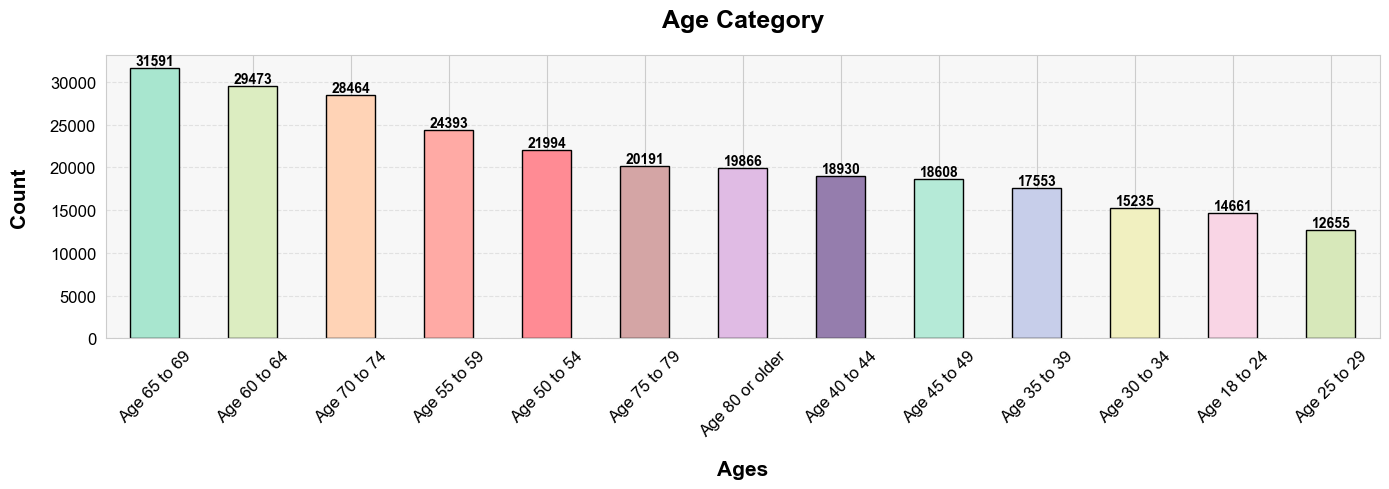

In [8]:
plt.figure(figsize=(14, 5))
ax = Data['AgeCategory'].value_counts().plot(kind='bar',color=soft_colors,rot=45,edgecolor='black')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2, p.get_height() + 1), ha='center',va='bottom',color='black',fontweight='bold')
plt.title("Age Category", color='black', weight='bold', fontsize=18, pad=20)
plt.xlabel('Ages', color='black', weight='bold', fontsize=15, labelpad=15)
plt.ylabel('Count', color='black', weight='bold', fontsize=15, labelpad=15)
plt.xticks(color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

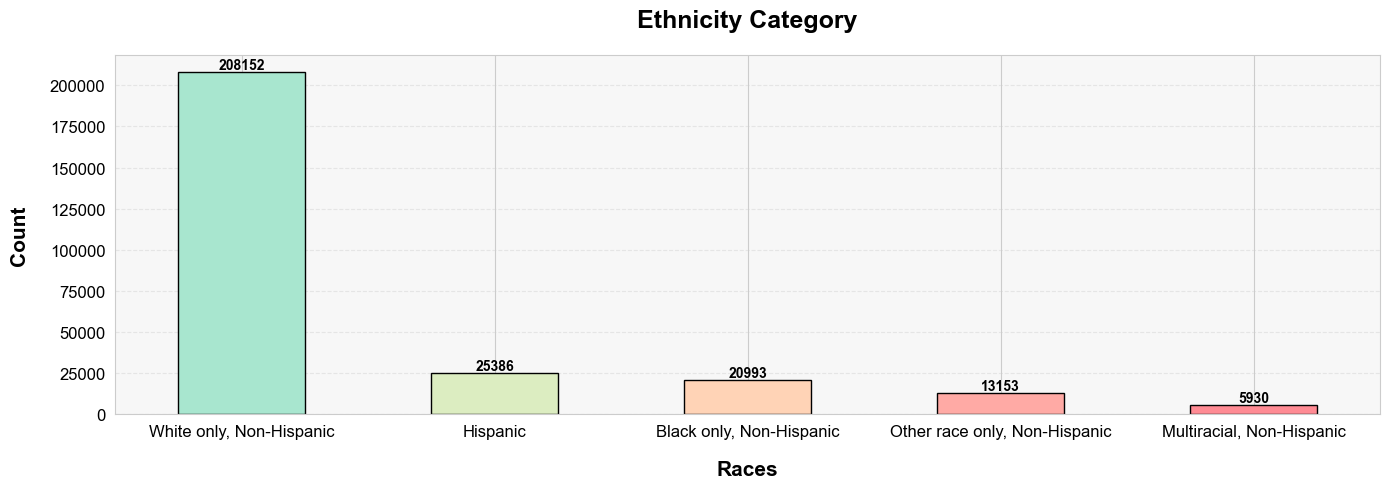

In [25]:
plt.figure(figsize=(14, 5))
ax = Data['RaceEthnicityCategory'].value_counts().plot(kind='bar',color=soft_colors,rot=0,edgecolor='black')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2, p.get_height() + 1),ha='center',va='bottom',color='black',fontweight='bold')

plt.title("Ethnicity Category", color='black', weight='bold', fontsize=18, pad=20)
plt.xlabel('Races', color='black', weight='bold', fontsize=15, labelpad=15)
plt.ylabel('Count', color='black', weight='bold', fontsize=15, labelpad=15)
plt.xticks(color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

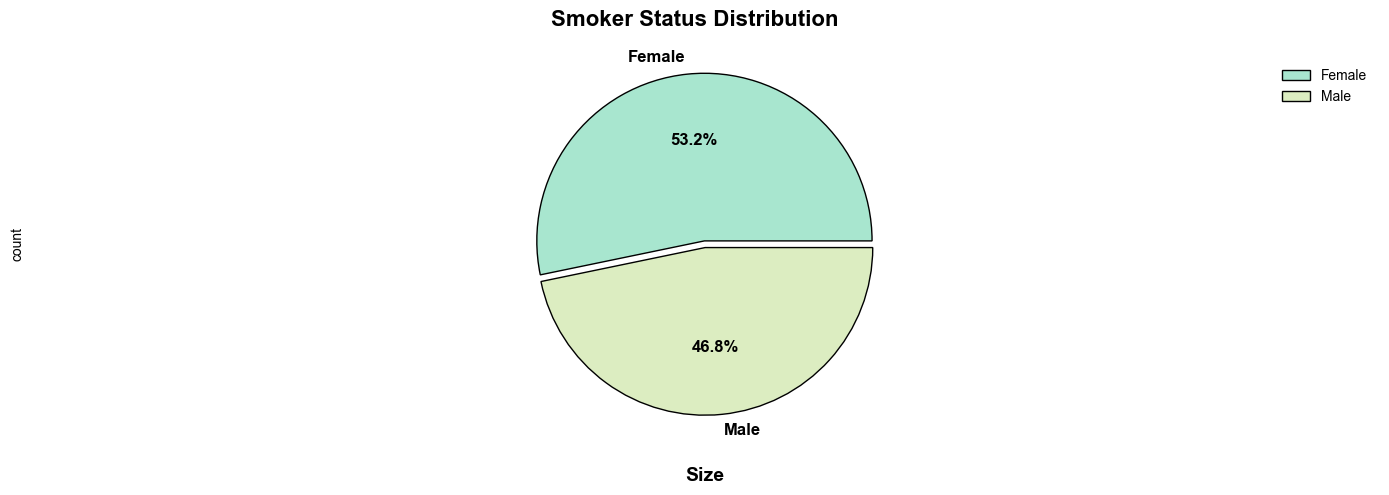

In [10]:
plt.figure(figsize=(14, 5))
explode = (0, 0.04)
counts = Data['Sex'].value_counts()
counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=explode,
    colors=soft_colors[:2],
    textprops={'color': 'black', 'fontsize': 12, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'black'})
plt.suptitle("Smoker Status Distribution", fontsize=16, fontweight='bold', color="black")
plt.xlabel('Size', weight="bold", color="black", fontsize=14, labelpad=25)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best", labelcolor='black', facecolor='white', edgecolor='white')
plt.tight_layout()
plt.show()

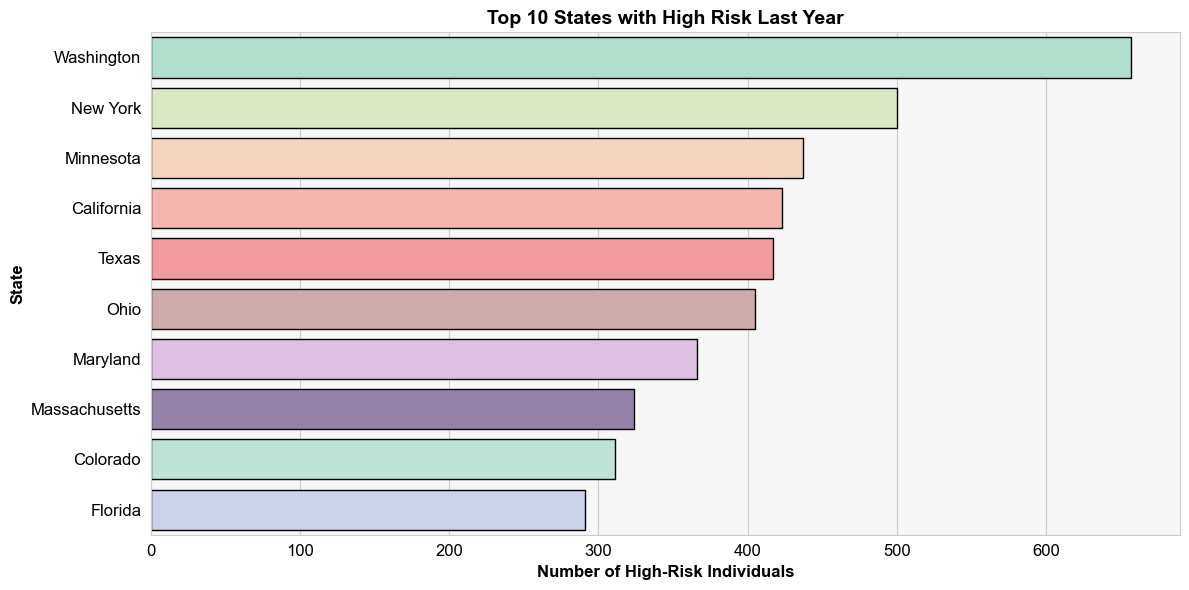

In [11]:
High_Risk_LastYear_State = Data[Data['HighRiskLastYear'] == 1]['State']
top_states = High_Risk_LastYear_State.value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values,y=top_states.index,palette=soft_colors[:10],edgecolor='black')
plt.title('Top 10 States with High Risk Last Year', fontsize=14, weight='bold', color='black')
plt.xlabel('Number of High-Risk Individuals', fontsize=12, color='black', weight='bold')
plt.ylabel('State', fontsize=12, color='black', weight='bold')
plt.xticks(color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.tight_layout()
plt.show()

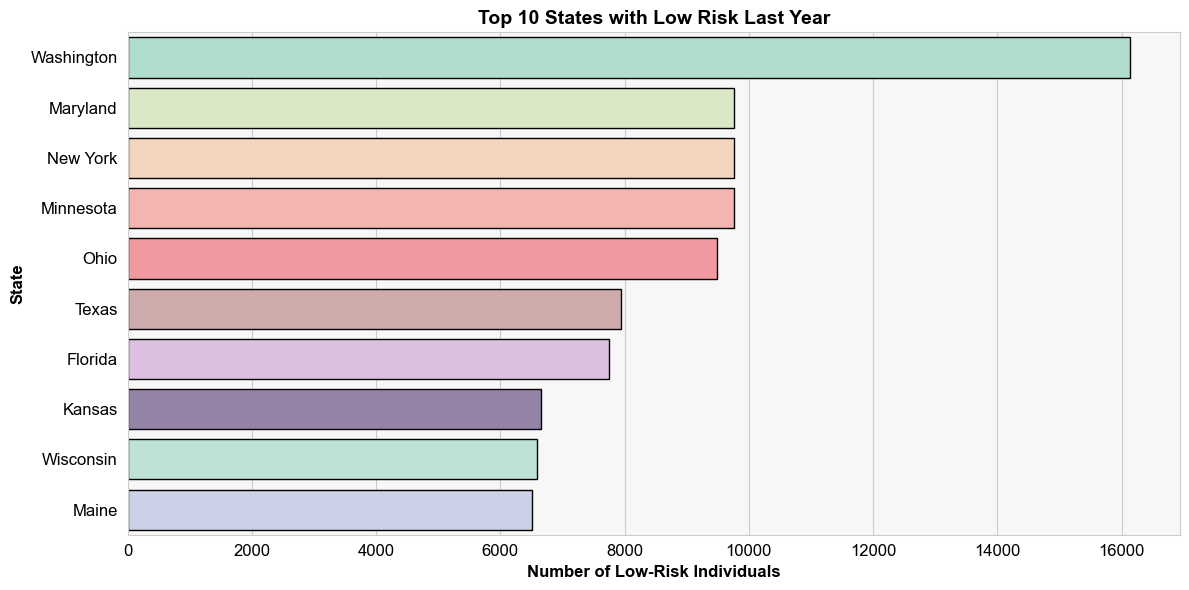

In [12]:
Low_Risk_LastYear_State = Data[Data['HighRiskLastYear'] == 0]['State']
low_states = Low_Risk_LastYear_State.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=low_states.values,y=low_states.index,palette=soft_colors[:10],edgecolor ='black')
plt.title('Top 10 States with Low Risk Last Year', fontsize=14, weight='bold', color='black')
plt.xlabel('Number of Low-Risk Individuals', fontsize=12, color='black', weight='bold')
plt.ylabel('State', fontsize=12, color='black', weight='bold')
plt.xticks(color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.tight_layout()
plt.show()

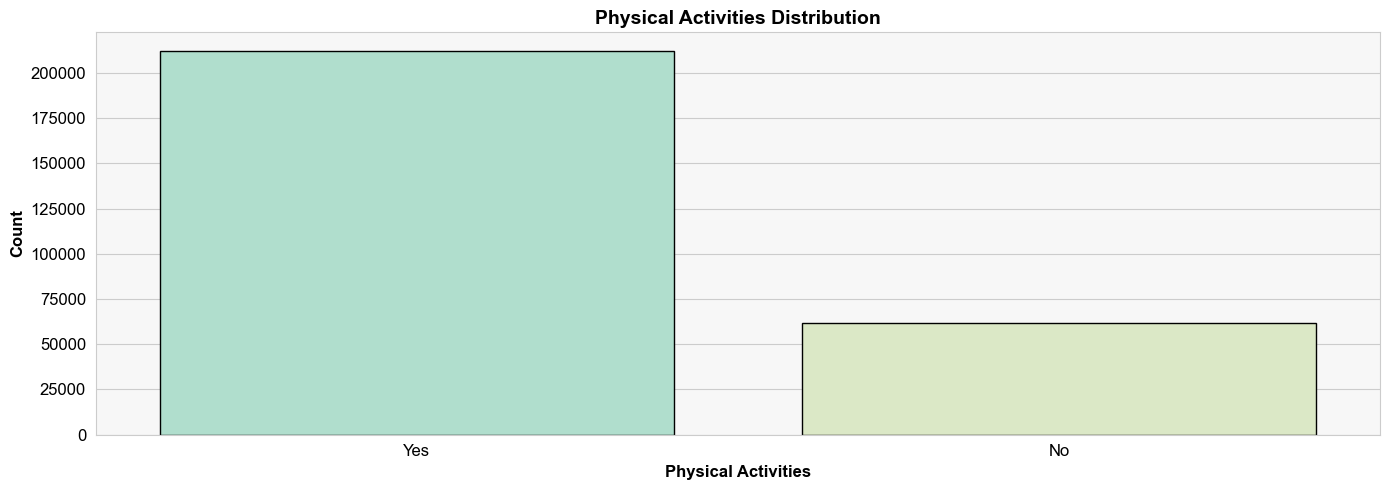

In [13]:
Physical_Activities = Data['PhysicalActivities'].value_counts()

plt.figure(figsize=(14, 5))
sns.barplot(x=Physical_Activities.index,y=Physical_Activities.values,palette=soft_colors[:2] ,edgecolor='black')
plt.title('Physical Activities Distribution', fontsize=14, weight='bold', color='black')
plt.xlabel('Physical Activities', fontsize=12, color='black', weight='bold')
plt.ylabel('Count', fontsize=12, color='black', weight='bold')
plt.xticks(color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.tight_layout()
plt.show()

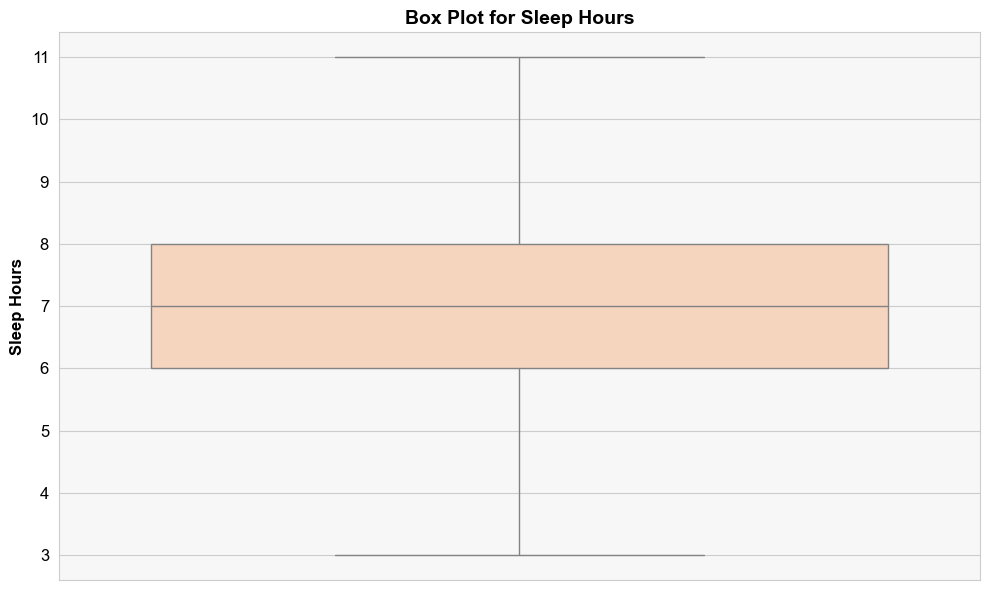

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data, y='SleepHours', color=soft_colors[2])  
plt.title('Box Plot for Sleep Hours', fontsize=14, weight='bold', color='black')
plt.ylabel('Sleep Hours', fontsize=12, color='black', weight='bold')
plt.yticks(color='black', fontsize=12)
plt.tight_layout()
plt.show()

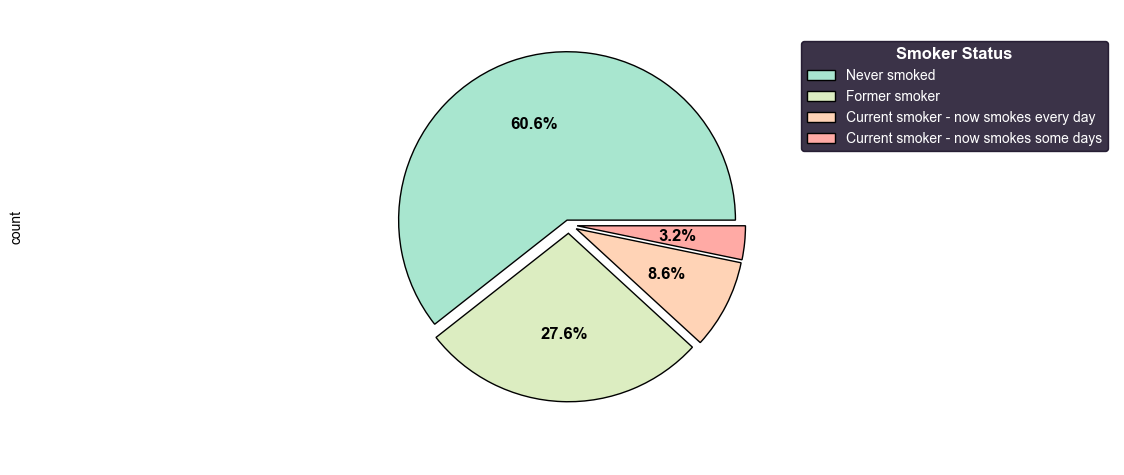

In [15]:
plt.figure(figsize=(14,5))
smoker = Data['SmokerStatus'].value_counts()
explode = (0.03, 0.05, 0.05, 0.05)
smoker.plot(
    kind='pie',
    colors=soft_colors[:len(smoker)],
    explode=explode,
    autopct='%1.1f%%',
    labels=None,
    textprops={'color': 'black', 'fontsize': 12, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Smoker Status Distribution", fontsize=16, fontweight='bold', color='white')
plt.xlabel('Size', weight="bold", color="white", fontsize=14, labelpad=20)
legend = plt.legend(labels=smoker.index,title='Smoker Status',title_fontsize=13,labelcolor='white',facecolor='#0A001A',edgecolor='#0A001A')
plt.setp(legend.get_title(), color='white', fontweight='bold', fontsize=12)
plt.axis('equal')
plt.show()


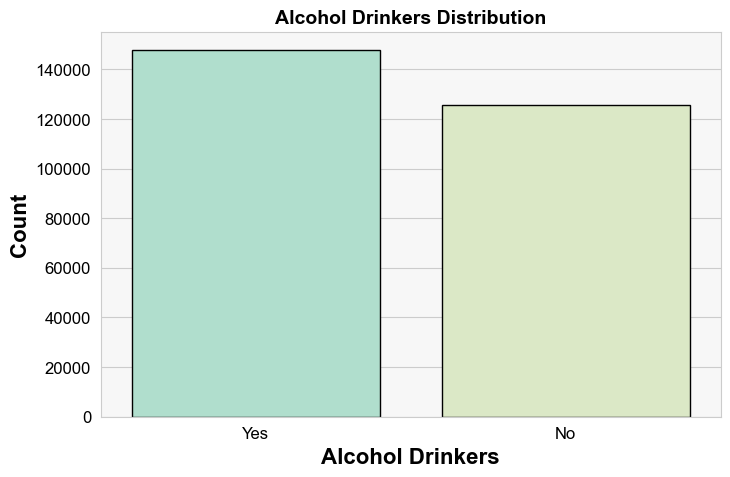

In [16]:
Alcohol = Data['AlcoholDrinkers'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=Alcohol.index,y=Alcohol.values,palette=soft_colors[:2],edgecolor='black')
plt.title('Alcohol Drinkers Distribution', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Alcohol Drinkers', color='black', weight='bold', fontsize=16)
plt.ylabel('Count', color='black', weight='bold', fontsize=16)
plt.xticks(color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.show()


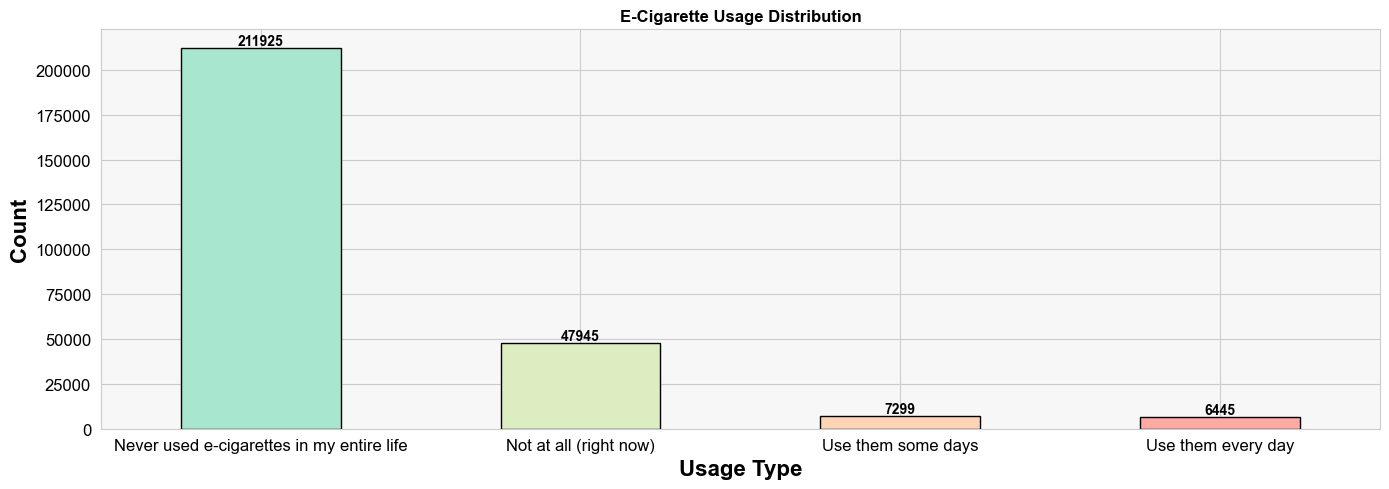

In [17]:
plt.figure(figsize=(14,5))
E_cigarette = Data['ECigaretteUsage'].value_counts().plot(kind='bar',color=soft_colors[:len(Data['ECigaretteUsage'].value_counts())],edgecolor='black')
for p in E_cigarette.patches:
    E_cigarette.annotate(int(p.get_height()),(p.get_x() + 0.25, p.get_height() + 2),ha='center',va='bottom',color='black',weight='bold')
plt.title("E-Cigarette Usage Distribution", color='black', weight='bold')
plt.xlabel('Usage Type', color='black', weight='bold', fontsize=16)
plt.ylabel('Count', color='black', weight='bold', fontsize=16)
plt.xticks(color='black', fontsize=12,rotation=0)
plt.yticks(color='black', fontsize=12)
plt.tight_layout()
plt.show()


In [18]:
display(Data['State'])

0                Alabama
1                Alabama
2                Alabama
3                Alabama
4                Alabama
               ...      
273609    Virgin Islands
273610    Virgin Islands
273611    Virgin Islands
273612    Virgin Islands
273613    Virgin Islands
Name: State, Length: 273614, dtype: object

In [19]:
import folium
from folium.plugins import HeatMap

In [20]:
geo_data=Data.groupby('State').size().reset_index(name='hadheartdisease')
us_states_geo = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
geo_data.head()

,State,hadheartdisease
0,Alabama,2892
1,Alaska,3547
2,Arizona,6063
3,Arkansas,3191
4,California,5828


In [21]:
m = folium.Map(location=[37.8, -96], zoom_start=4, tiles="cartodb positron")

folium.Choropleth(
    geo_data=us_states_geo,
    name='choropleth',
    data=geo_data,
    columns=['State', 'hadheartdisease'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Heart Disease Cases'
).add_to(m)
folium.LayerControl().add_to(m)
m

In [22]:
x = Data.groupby(['Sex'])['GeneralHealth'].value_counts()
df_health = x.reset_index(name='Count')
order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
df_health['GeneralHealth'] = pd.Categorical(df_health['GeneralHealth'], categories=order, ordered=True)
colors = ["#25BFB9", "#9685E5"] 
fig = px.bar(
    df_health,
    x='GeneralHealth',
    y='Count',
    color='Sex',
    barmode='group',
    color_discrete_sequence=colors,
    title='General Health Distribution by Sex',
    labels={'GeneralHealth':'General Health', 'Count':'Number of People', 'Sex':'Sex'})
fig.show()

In [23]:
condition_cols = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer']
df_counts = Data.groupby('AgeCategory')[condition_cols].sum().reset_index()
df_melted = df_counts.melt(id_vars='AgeCategory',value_vars=condition_cols,var_name='Condition',value_name='Count')

soft_palette_darker = ["#25BFB9","#7ED6A8","#E8C48F","#E8A9B9","#9685E5"]
fig = px.line(
    df_melted,
    x='AgeCategory',
    y='Count',
    color='Condition',
    color_discrete_sequence=soft_palette_darker,
    markers=True,
    title='Health Conditions Distribution by Age Category',
    labels={'AgeCategory': 'Age Category', 'Count': 'Number of People', 'Condition': 'Health Condition'})
fig.show()